In [0]:
import scipy
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
real_probs_dict = {'R':0.8,'G':0.4,'B':0.3}
assets = ['R','G','B']

In [0]:
'''
This function takes as input three tuples for alpha,beta that specify priorR,priorG,priorB 
And returns R,G,B along with the maximum value sampled from these three distributions.
We can sample from a beta distribution using scipy.
'''
def find_asset(priorR,priorG,priorB):    
    red_rv = scipy.stats.beta.rvs(priorR[0],priorR[1])
    green_rv = scipy.stats.beta.rvs(priorG[0],priorG[1])
    blue_rv = scipy.stats.beta.rvs(priorB[0],priorB[1])
    return assets[np.argmax([red_rv,green_rv,blue_rv])]


'''
This is a helper function that simulates the real world using the actual probability value of the assets.
In real life we won't have this function and our user click input will be the proxy for this function.
'''
def simulate_real_website(asset, real_probs_dict):
    #simulate a coin toss with probability. Asset clicked or not.
    if real_probs_dict[asset]> scipy.stats.uniform.rvs(0,1):
        return 1
    else:
        return 0

'''
This function takes as input the selected asset and returns the posteriors for the selected asset.
'''
def update_posterior(asset,priorR,priorG,priorB,outcome):
    if asset=='R':
        priorR=(priorR[0]+outcome,priorR[1]+1-outcome)
    elif asset=='G':
        priorG=(priorG[0]+outcome,priorG[1]+1-outcome)
    elif asset=='B':
        priorB=(priorB[0]+outcome,priorB[1]+1-outcome)
    return priorR,priorG,priorB

'''
This function runs the strategy once.
'''
def run_strategy_once(priorR,priorG,priorB):
    # 1. get the asset
    asset = find_asset(priorR,priorG,priorB)
    # 2. get the outcome from the website/users
    outcome = simulate_real_website(asset, real_probs_dict)
    # 3. update prior based on outcome
    priorR,priorG,priorB = update_posterior(asset,priorR,priorG,priorB,outcome)
    return asset,priorR,priorG,priorB

In [0]:
priorR,priorG,priorB = (1,1),(1,1),(1,1)
data = [("_",priorR,priorG,priorB)]
for i in range(50):
    asset,priorR,priorG,priorB = run_strategy_once(priorR,priorG,priorB)
    data.append((asset,priorR,priorG,priorB))

In [0]:
def plot_posteriors(priorR,priorG,priorB,ax=None,title=None):
    #fig = plt.figure(figsize=(12.5, 10))
    parameters = [priorR,priorG,priorB]
    x = np.linspace(0.001, 1, 150)
    for i, (alpha, beta) in enumerate(parameters):
        color = assets[i]
        y = scipy.stats.beta.pdf(x, alpha, beta)
        lines = sns.lineplot(x, y, label="%s (%.1f,%.1f)" % (color, alpha, beta), color = color,ax=ax)
        plt.fill_between(x, 0, y, alpha=0.2, color=color)
        if title:
            plt.title(title)
        plt.autoscale(tight=True)
    plt.legend(title=r"$\alpha, \beta$ - parameters")
    return plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


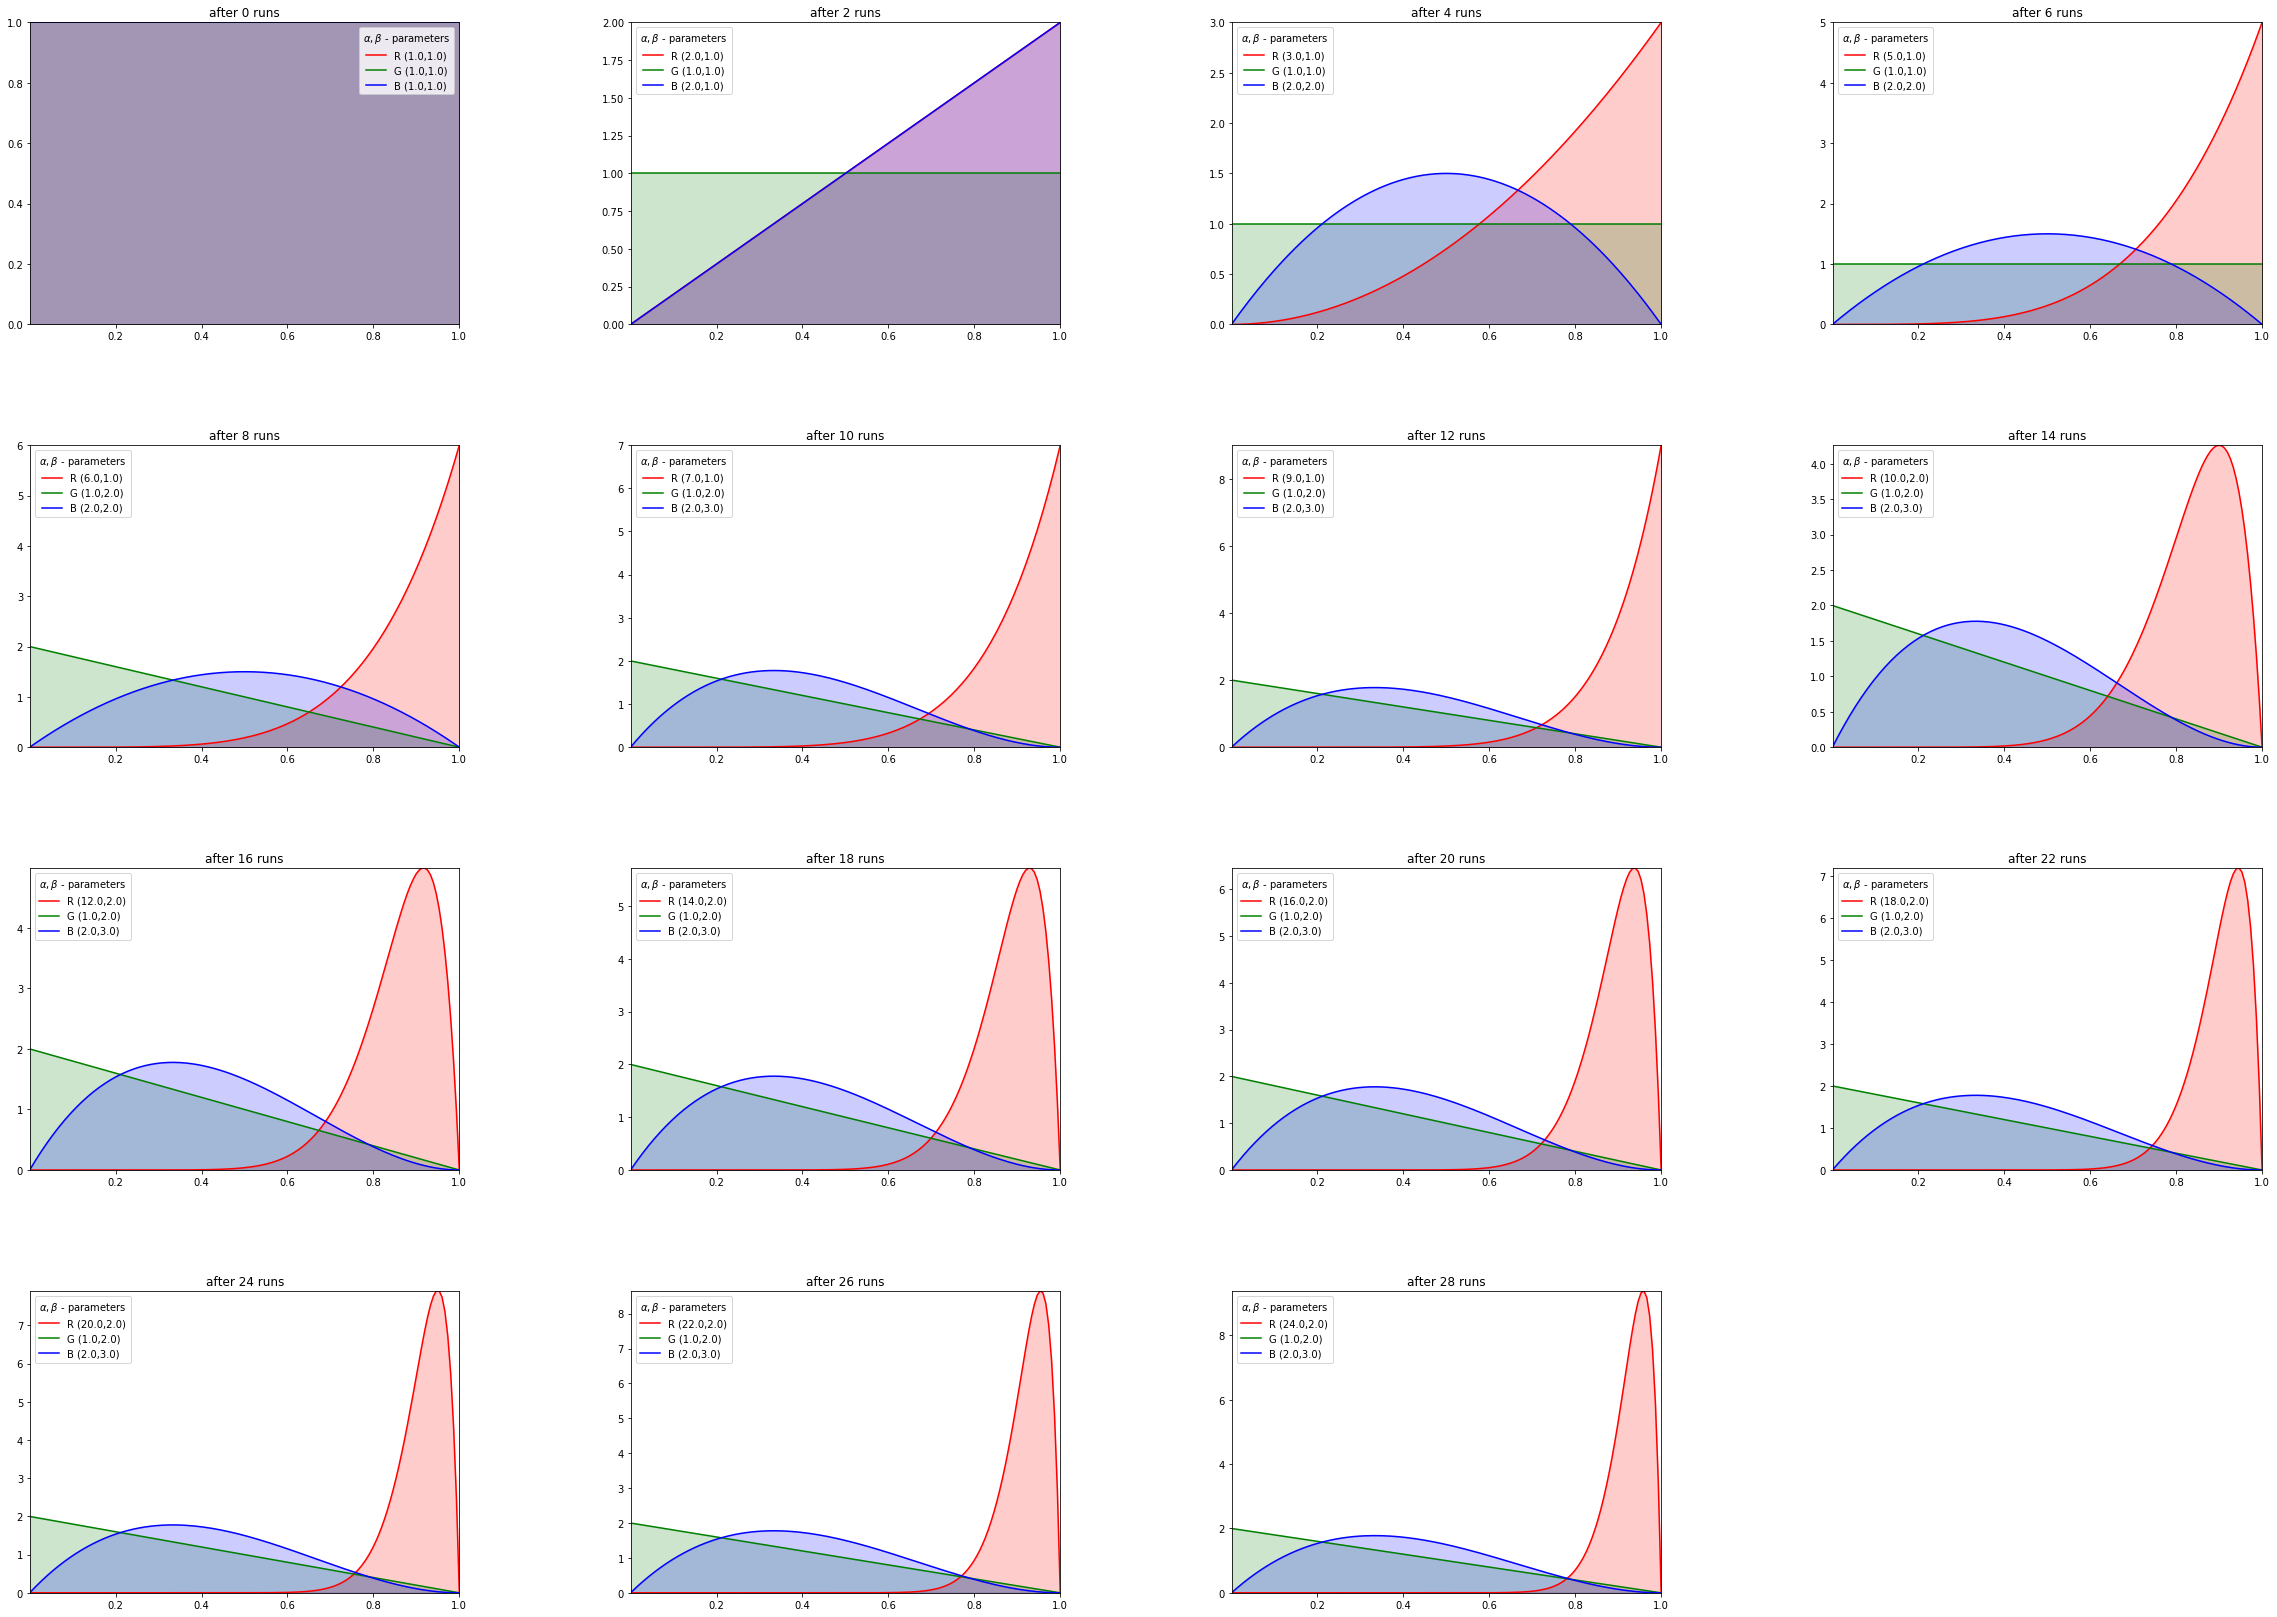

In [6]:
fig = plt.figure(figsize=(40, 60))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
cnt=1
for i in range(0,30,2):
    ax = fig.add_subplot(8, 4, cnt)
    g = plot_posteriors(*data[i][1:],ax,"after "+str(i)+" runs")
    cnt+=1
plt.show()

In [7]:
for i,x in enumerate(data[1:]):
    print("Pick",i+1,":",x[0],end=" ,")

Pick 1 : B ,Pick 2 : R ,Pick 3 : B ,Pick 4 : R ,Pick 5 : R ,Pick 6 : R ,Pick 7 : G ,Pick 8 : R ,Pick 9 : R ,Pick 10 : B ,Pick 11 : R ,Pick 12 : R ,Pick 13 : R ,Pick 14 : R ,Pick 15 : R ,Pick 16 : R ,Pick 17 : R ,Pick 18 : R ,Pick 19 : R ,Pick 20 : R ,Pick 21 : R ,Pick 22 : R ,Pick 23 : R ,Pick 24 : R ,Pick 25 : R ,Pick 26 : R ,Pick 27 : R ,Pick 28 : R ,Pick 29 : R ,Pick 30 : R ,Pick 31 : R ,Pick 32 : R ,Pick 33 : R ,Pick 34 : R ,Pick 35 : R ,Pick 36 : R ,Pick 37 : R ,Pick 38 : R ,Pick 39 : R ,Pick 40 : R ,Pick 41 : R ,Pick 42 : R ,Pick 43 : R ,Pick 44 : R ,Pick 45 : R ,Pick 46 : R ,Pick 47 : R ,Pick 48 : R ,Pick 49 : R ,Pick 50 : R ,

In [8]:
from collections import Counter
Counter([x[0] for x in data[1:]])

Counter({'B': 3, 'G': 1, 'R': 46})

/usr/local/lib/python3.6/dist-packages/seaborn/palettes.py:246: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  palette = _ColorPalette(palette)


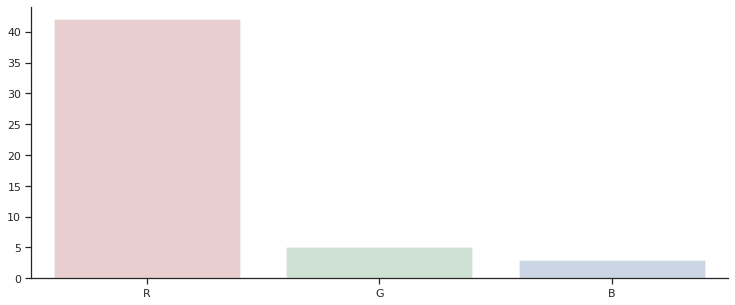

In [9]:
fig = plt.figure(figsize=(12.5, 5))
sns.set(style="ticks")
sns.barplot(x=['R','G','B'],y=[42,5,3],palette=['R','G','B'],alpha=0.3)
sns.despine()